In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import xarray as xr
import numpy as np

In [2]:
zarr_path="tracking_results_merged_jf.zarr"

# Load tracking data
ds = xr.open_zarr(zarr_path, consolidated=False)

In [3]:
x_pos = np.array(ds['SmoothX'].values)
y_pos = np.array(ds['SmoothY'].values)

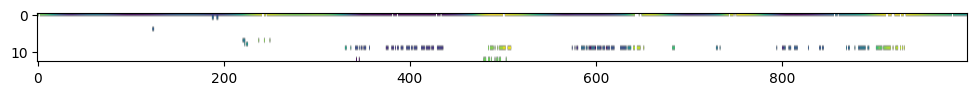

In [4]:
plt.figure(figsize=(12, 6))

plt.imshow(ds['SmoothX'].values, aspect=4);

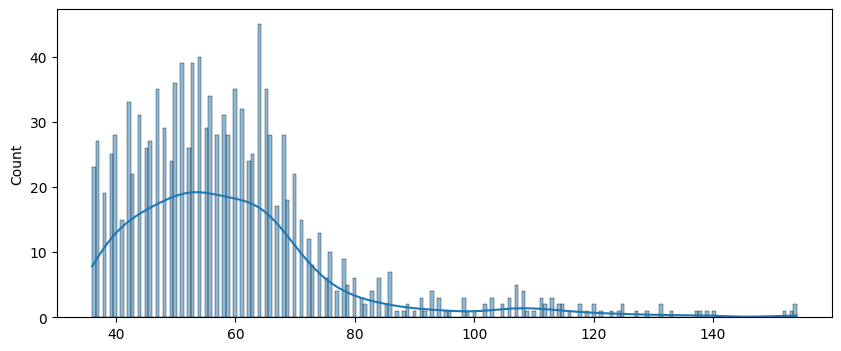

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(ds['area'].values.flatten(), bins=200, kde=True, kde_kws={'bw_adjust': 0.9});

In [6]:
fig = go.Figure()

for i in range(x_pos.shape[0]):
    fig.add_trace(go.Scatter(
        x=x_pos[i], 
        y=y_pos[i], 
        mode='lines', 
        name=f'Track {i}'
    ))

fig.update_layout(
    title='Trajectories of Tracked Objects',
    xaxis_title='X Position',
    yaxis_title='Y Position',
    yaxis=dict(
        autorange="reversed", # Invert Y axis to match image coordinates
        scaleanchor="x",      # Link y-axis scale to x-axis
        scaleratio=1          # Ensure 1:1 aspect ratio
    ),
    width=900,
    height=900
)

fig.show()

In [ ]:
# fig = go.Figure()

# # Get the total number of frames for consistent color scaling
# n_frames = x_pos.shape[1]

# for i in range(x_pos.shape[0]):
#     # Get valid (non-NaN) mask for this track
#     valid_mask = ~np.isnan(x_pos[i])
    
#     # Get only valid positions and their corresponding frame indices
#     valid_x = x_pos[i][valid_mask]
#     valid_y = y_pos[i][valid_mask]
#     valid_frames = np.arange(n_frames)[valid_mask]  # Actual frame numbers for valid points
    
#     fig.add_trace(go.Scatter(
#         x=valid_x, 
#         y=valid_y, 
#         mode='markers',
#         marker=dict(
#             size=3,
#             color=valid_frames,   # Color by actual frame number
#             colorscale='Viridis',
#             cmin=0,               # Fix color scale to start at frame 0
#             cmax=n_frames - 1,    # Fix color scale to end at last frame
#             showscale=(i == 0),
#             colorbar=dict(title='Frame')
#         ),
#         name=f'Track {i}'
#     ))

# fig.update_layout(
#     title='Trajectories of Tracked Objects (Colored by Frame)',
#     xaxis_title='X Position',
#     yaxis_title='Y Position',
#     yaxis=dict(
#         autorange="reversed",
#         scaleanchor="x",
#         scaleratio=1
#     ),
#     width=900,
#     height=700
# )

# fig.show()

In [ ]:
# is_reversal = np.array(ds['is_Reversal']) == True
# is_omega = np.array(ds['is_Omega']) == True
# is_upsilon = np.array(ds['is_Upsilon']) == True

# fig = go.Figure()

# n_frames = x_pos.shape[1]

# for i in range(x_pos.shape[0]):
#     # Get valid (non-NaN) mask for this track
#     valid_mask = ~np.isnan(x_pos[i])
    
#     # Skip empty tracks
#     if not np.any(valid_mask):
#         continue
        
#     # Get only valid positions and their corresponding frame indices
#     valid_x = x_pos[i][valid_mask]
#     valid_y = y_pos[i][valid_mask]
#     valid_frames = np.arange(n_frames)[valid_mask]
    
#     # Determine colors for each point in the track
#     point_colors = []
#     for f in valid_frames:
#         if is_omega[i, f]:
#             point_colors.append('rgb(255, 0, 0)')      # Red for omega
#         elif is_upsilon[i, f]:
#             point_colors.append('rgb(255, 165, 0)')    # Orange for upsilon
#         elif is_reversal[i, f]:
#             point_colors.append('rgb(255, 255, 0)')    # Yellow for reversal
#         else:
#             point_colors.append('rgb(0, 200, 0)')      # Green for normal

#     fig.add_trace(go.Scatter(
#         x=valid_x, 
#         y=valid_y, 
#         mode='markers',
#         marker=dict(
#             size=3,
#             color=point_colors,
#         ),
#         name=f'Track {i}'
#     ))

# fig.update_layout(
#     title='Trajectories of Tracked Objects (Colored by Category)',
#     xaxis_title='X Position',
#     yaxis_title='Y Position',
#     yaxis=dict(
#         autorange="reversed",
#         scaleanchor="x",
#         scaleratio=1
#     ),
#     width=900,
#     height=700
# )

# fig.show()

In [ ]:
is_forward = ds['refined_is_forward'].values == True
is_reverse = ds['refined_is_reverse'].values == True
is_paused = ds['refined_is_paused'].values == True

fig = go.Figure()

n_frames = x_pos.shape[1]

for track_idx in range(x_pos.shape[0]):
    # if track_idx != 185:
        # continue
        
    # Get valid (non-NaN) mask for this track
    valid_mask = ~np.isnan(x_pos[track_idx])
    
    # Skip empty tracks
    if not np.any(valid_mask):
        continue
        
    # Get only valid positions and their corresponding frame indices
    valid_x = x_pos[track_idx][valid_mask]
    valid_y = y_pos[track_idx][valid_mask]
    valid_frames = np.arange(n_frames)[valid_mask]
    
    # Determine colors for each point in the track
    point_colors = []
    for f in valid_frames:
        if is_forward[track_idx, f]:
            point_colors.append('rgb(0, 200, 0)')      # Green for forward
        elif is_reverse[track_idx, f]:
            point_colors.append('rgb(255, 165, 0)')    # Orange for paused
        elif is_paused[track_idx, f]:
            point_colors.append('rgb(255, 255, 0)')    # Yellow for reversal
        else:
            point_colors.append('rgb(50, 50, 50)')      # Grey for unknown

    fig.add_trace(go.Scatter(
        x=valid_x, 
        y=valid_y, 
        mode='markers',
        marker=dict(
            size=3,
            color=point_colors,
        ),
        name=f'Track {track_idx}'
    ))

fig.update_layout(
    title='Trajectories of Tracked Objects (Colored by Category)',
    xaxis_title='X Position',
    yaxis_title='Y Position',
    yaxis=dict(
        autorange="reversed",
        scaleanchor="x",
        scaleratio=1
    ),
    width=900,
    height=700
)

fig.show()

In [7]:
area_values = ds['area'].values
# Calculate global min and max for consistent color scaling
area_min = np.nanmin(area_values)
area_max = np.nanmax(area_values)


collided_tracks = np.argwhere(np.nanmax(area_values, axis=1) > 100)[:,0].tolist()

In [8]:
fig = go.Figure()

first_trace = True

for track_idx in range(x_pos.shape[0]):
    if track_idx not in collided_tracks:
        continue
    # Get valid (non-NaN) mask for this track
    valid_mask = ~np.isnan(x_pos[track_idx])
    
    # Skip empty tracks
    if not np.any(valid_mask):
        continue
        
    # Get only valid positions and their corresponding area
    valid_x = x_pos[track_idx][valid_mask]
    valid_y = y_pos[track_idx][valid_mask]
    valid_area = area_values[track_idx][valid_mask]
    
    fig.add_trace(go.Scatter(
        x=valid_x, 
        y=valid_y, 
        mode='markers',
        marker=dict(
            size=8,
            color=valid_area,
            colorscale='Viridis',
            cmin=area_min,
            cmax=area_max,
            # showscale=first_trace,
            # colorbar=dict(title='Area')
        ),
        # name=f'Track {track_idx}'
    ))
    
    if first_trace:
        first_trace = False

fig.update_layout(
    title='Trajectories of Tracked Objects (Colored by Area)',
    xaxis_title='X Position',
    yaxis_title='Y Position',
    yaxis=dict(
        autorange="reversed",
        scaleanchor="x",
        scaleratio=1
    ),
    width=900,
    height=900
)

fig.show()

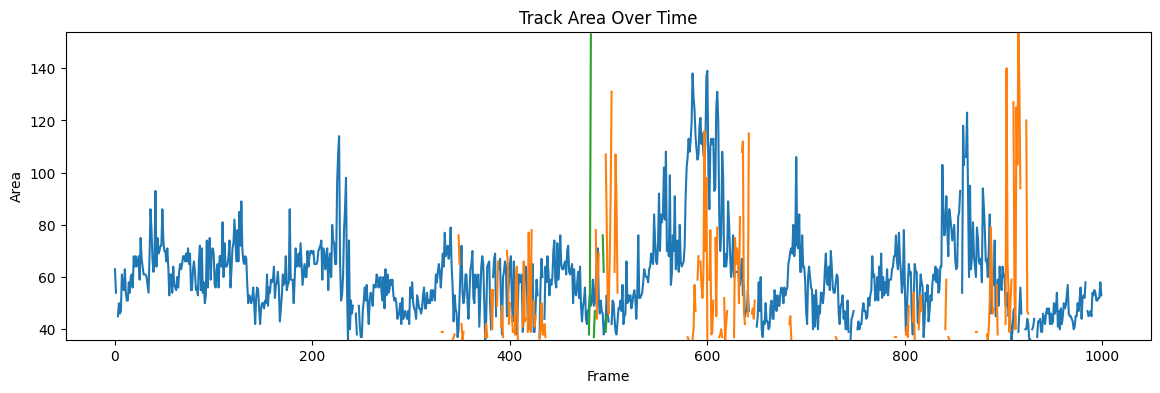

In [9]:
plt.figure(figsize=(14, 4))

for track_idx in collided_tracks:
    area_track = area_values[track_idx]
    plt.plot(area_track)
plt.title('Track Area Over Time')
plt.xlabel('Frame')
plt.ylabel('Area')
plt.ylim(area_min, area_max)
plt.show()

In [ ]:
import numpy as np

mat_file_path = '/home/alex/Videos/BehaviorVideos/2021-07-28-01-N2_woutFoodwCuR_c8/2021-07-28-01-N2_woutFoodwCuR_c8.linkedTracks.mat'

In [ ]:
from mat4py import loadmat

mat_data = loadmat(mat_file_path)

In [ ]:
track_idx = 70


In [ ]:
total_frames = int(max(mat_data['linkedTracks']['Frames'][0]))
n_tracks = len(mat_data['linkedTracks']['Frames'])

In [ ]:
SmoothX = np.full((n_tracks, total_frames), np.nan)
SmoothY = np.full((n_tracks, total_frames), np.nan)

for track_idx in range(len(mat_data['linkedTracks']['Frames'])):
    frames = np.array(mat_data['linkedTracks']['Frames'][track_idx], dtype=int)
    x_positions = mat_data['linkedTracks']['SmoothX'][track_idx]
    y_positions = mat_data['linkedTracks']['SmoothY'][track_idx]
    
    for f, x, y in zip(frames, x_positions, y_positions):
        SmoothX[track_idx, f - 1] = x  # Convert to 0-based index
        SmoothY[track_idx, f - 1] = y  # Convert to 0-based index

In [ ]:
import matplotlib.pyplot as plt

plt.hist(np.concatenate(mat_data['linkedTracks']['Size']), bins=100);

In [ ]:
SmoothX.shape

In [ ]:
mat_data['linkedTracks']['Reorientations'][track_idx]

In [ ]:
reorientation_classes = ['lRevOmega',
                        'lRevUpsilon',
                        'pure_Upsilon',
                        'pure_lRev',
                        'pure_omega',
                        'pure_sRev',
                        'sRevOmega',
                        'sRevUpsilon']

In [ ]:
from plotly import graph_objects as go
import plotly.express as px

# Define frame constraints
start_frame = 0
end_frame = 2500  # You can change this to a smaller range, e.g., 1000

# Define a color map for the reorientation classes
colors = px.colors.qualitative.Plotly
class_color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(reorientation_classes)}
class_color_map[''] = 'lightgrey'  # Default color for no reorientation

fig = go.Figure()

# Add dummy traces for the legend so we can see what color corresponds to what class
for cls in reorientation_classes:
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=10, color=class_color_map[cls]),
        name=cls
    ))

for track_idx in range(len(mat_data['linkedTracks']['Frames'])):
    if track_idx != 11:
        continue
    # Get valid (non-NaN) mask for this track
    valid_mask = ~np.isnan(SmoothX[track_idx])
    
    # Skip empty tracks
    if not np.any(valid_mask):
        continue
        
    # Get only valid positions and their corresponding frame indices
    valid_x = SmoothX[track_idx][valid_mask]
    valid_y = SmoothY[track_idx][valid_mask]
    valid_frames = np.arange(total_frames)[valid_mask]
    
    # Apply frame constraints
    frame_constraint_mask = (valid_frames >= start_frame) & (valid_frames < end_frame)
    
    # Skip if no frames in the range for this track
    if not np.any(frame_constraint_mask):
        continue
        
    valid_x = valid_x[frame_constraint_mask]
    valid_y = valid_y[frame_constraint_mask]
    valid_frames = valid_frames[frame_constraint_mask]
    
    reorientation_category = [''] * total_frames
    
    # Extract reorientation data safely
    reorient_data = mat_data['linkedTracks']['Reorientations'][track_idx]
    
    # Check if data exists (mat4py returns empty dict or dict with empty lists for empty structs)
    if isinstance(reorient_data, dict) and len(reorient_data) > 0:
        starts = reorient_data.get('start', [])
        ends = reorient_data.get('end', [])
        classes = reorient_data.get('class', [])
        
        # Normalize to lists (handle scalar vs list)
        starts = starts if isinstance(starts, list) else [starts]
        ends = ends if isinstance(ends, list) else [ends]
        classes = classes if isinstance(classes, list) else [classes]
        
        if len(starts) > 0:
            reorientation_events = zip(starts, ends, classes)
            for start, end, category in reorientation_events:
                s, e = int(start), int(end)
                # Assign category to frames
                for f in range(s-1, e):
                    if f < total_frames:
                        reorientation_category[f] = category

    # Map categories to colors for valid frames
    point_colors = [class_color_map.get(reorientation_category[f], 'lightgrey') for f in valid_frames]

    fig.add_trace(go.Scatter(
        x=valid_x, 
        y=valid_y, 
        mode='markers',
        marker=dict(
            size=3,
            color=point_colors,
        ),
        name=f'Track {track_idx}',
        showlegend=False  # Hide individual tracks to keep legend clean
    ))

fig.update_layout(
    title=f'Trajectories of Tracked Objects (Frames {start_frame}-{end_frame})',
    xaxis_title='X Position',
    yaxis_title='Y Position',
    yaxis=dict(
        autorange="reversed",
        scaleanchor="x",
        scaleratio=1
    ),
    width=900,
    height=700
)

fig.show()

In [ ]:
mat_data['linkedTracks']['Reorientations'][11]